# Psych 205 - Tutorial 1
## Learning about loops, graphics and a little exercise on SEM

This is the first tutorial exercise from Psych 205, recreated in an R Jupyter notebook. Ordinarily you would create new plot windows for every single plot, but in this case we are going to just plot them inline since that's the whole idea with iPython notebooks. 

In [25]:
# Set CRAN Repo manually - you have to do this for R Jupyter notebooks
options(repos = "http://cran.us.r-project.org")

#install and require Hmisc
install.packages("Hmisc")
require(Hmisc)

package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\William\AppData\Local\Temp\Rtmpa0ndY9\downloaded_packages


Loading required package: Hmisc
Warning message:
"package 'Hmisc' was built under R version 3.4.3"Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



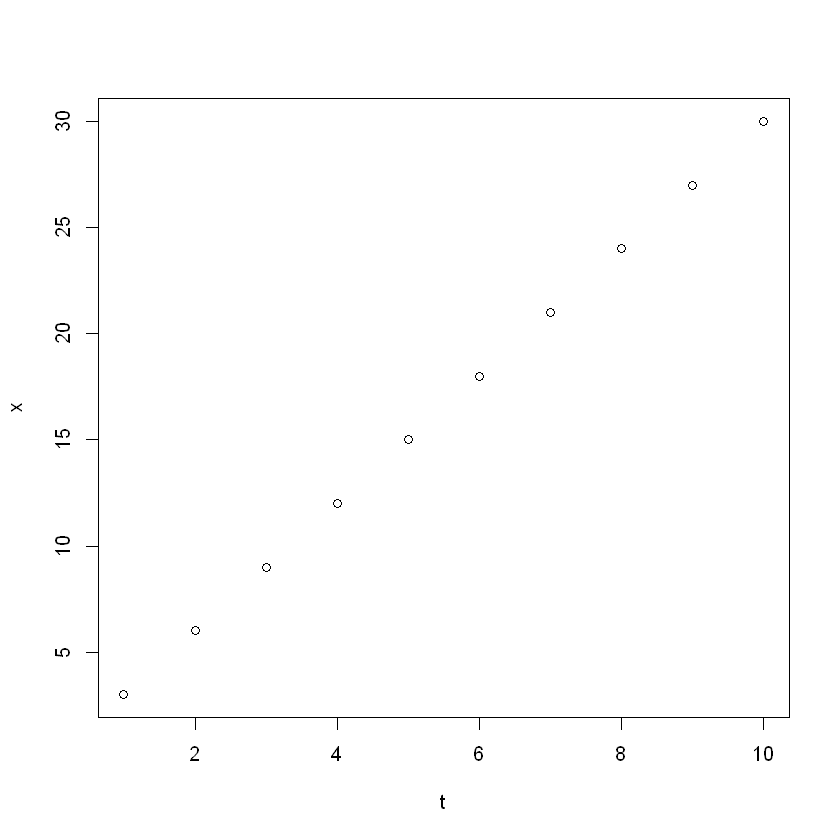

In [27]:
set.seed(1)

# Define a vector x (a one dimensional array that has 10 elemens)

x <- array(0,10)

# An alternative to doing this is as follows:

x <- rep(0,10)

t <- seq(1,10)

# Use a for loop to change the value of x. Here i is the "index" and it takes values from 1 to 10
for (i in 1:10) {
x[i] <- i*3 
}

## You can do this more computationally efficiently, as follows (for loops in R are slow):
x[1:10] <- seq(3,30,by=3)

sampMeans <- rep(0,100)
sampMeans[1:100] <- sapply( 1:100, function(x) mean(rnorm(100,mean=100,sd=10)) ) # If you need something to actually vary in your function, put the x where the varying needs to happen (for example, if you wanted some different means, you could write mean=x)

plot(t, x)

# We can generate 100 samples from a normal distribution with mean 100 and standard deviation 10

xSamp <- rnorm(100,mean=100, sd=10)
meanSamp <- mean(xSamp)


## Exercise 1. Check the values of xSamp, draw a histogram (hist function), show the mean on the histogram as a dashed vertical line (abline)


xSamp 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     100        0      100        1    100.1    8.965    88.07    90.32 
     .25      .50      .75      .90      .95 
   95.16    98.98   105.26   110.48   112.55 

lowest :  83.83237  84.04919  84.67366  85.59168  87.29945
highest: 112.59318 112.67138 115.99584 118.57780 119.33104

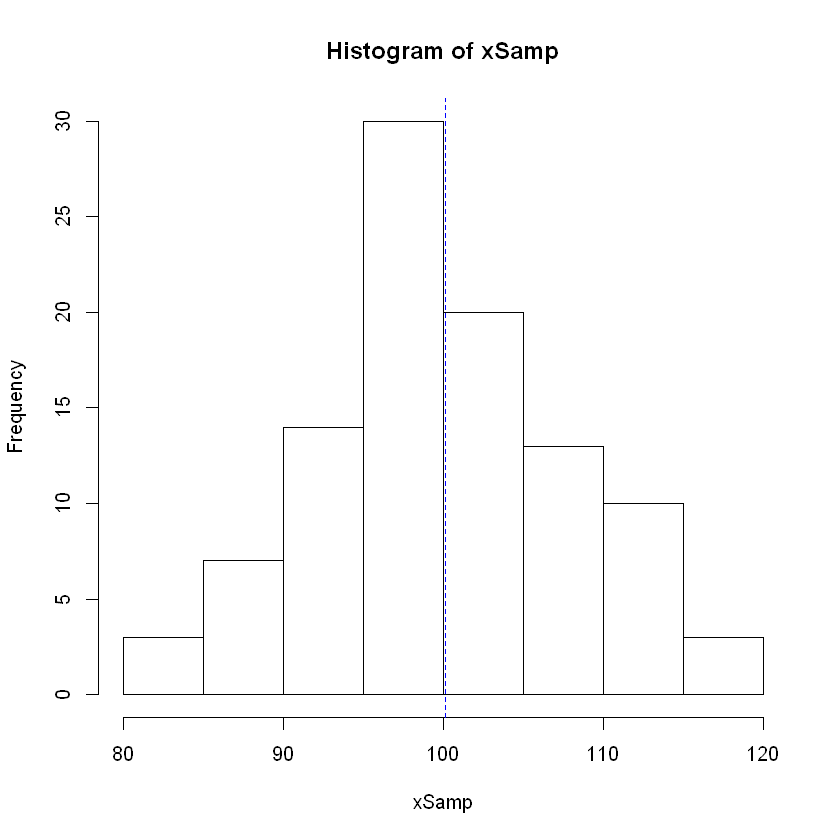

In [29]:
describe(xSamp)

hist(xSamp)
abline(v=mean(xSamp), col="blue", lty=2)

## Exercise 2. Write a loop to generate 100 samples from the same normal distribution (each of 100 data points) and save the sample mean in an array


In [31]:
means = 1:100

for (i in 1:100){
  means[i] = mean(rnorm(100, mean=100, sd=10))
}

head(means)

[1] 101.82108  99.48625 101.94551 101.75294  99.88654  99.36651

## Exercise 3. On a new window (dev.new()). Display the distribution of sample mean in a histogram and show the mean of means as a vertical dashed line. Compare to the histogram of samples. 


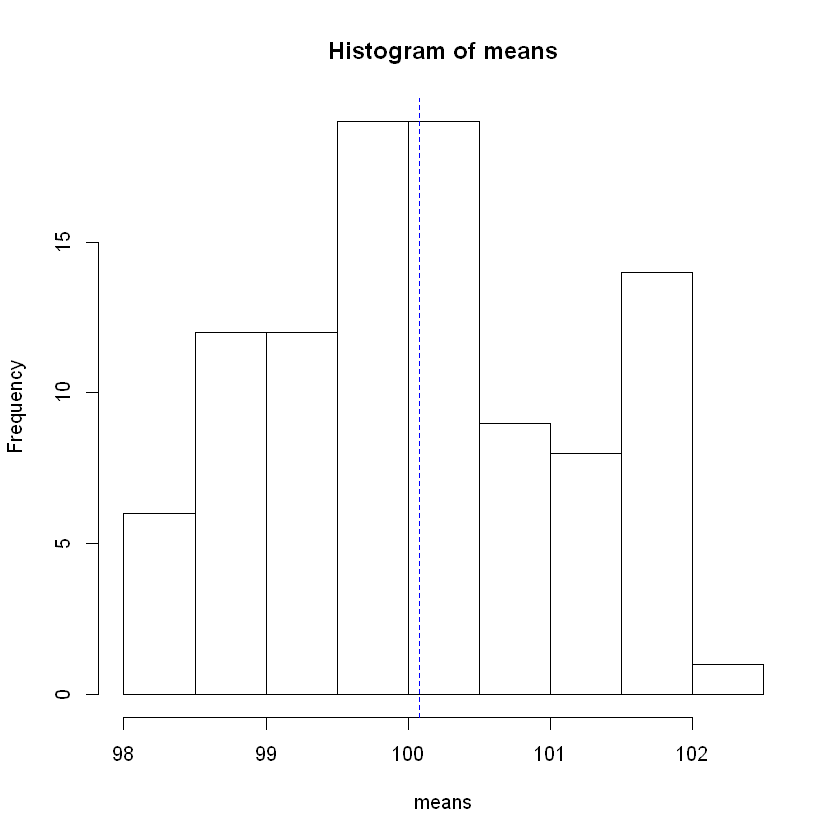

In [32]:
hist(means)
abline(v=mean(means), col="blue", lty=2)

## Exercise 4. Calculate the standard deviation (sd) of this DOSM. Does the number agree with the theoretical value?


In [12]:
sd(means)

[1] 0.7948833

This $/mu$ does not agree with the theoretical value. This is expected, because you are only doing 100 samples. 

## Exercise 5. Use the arrows command to draw an arrow showing the sem.


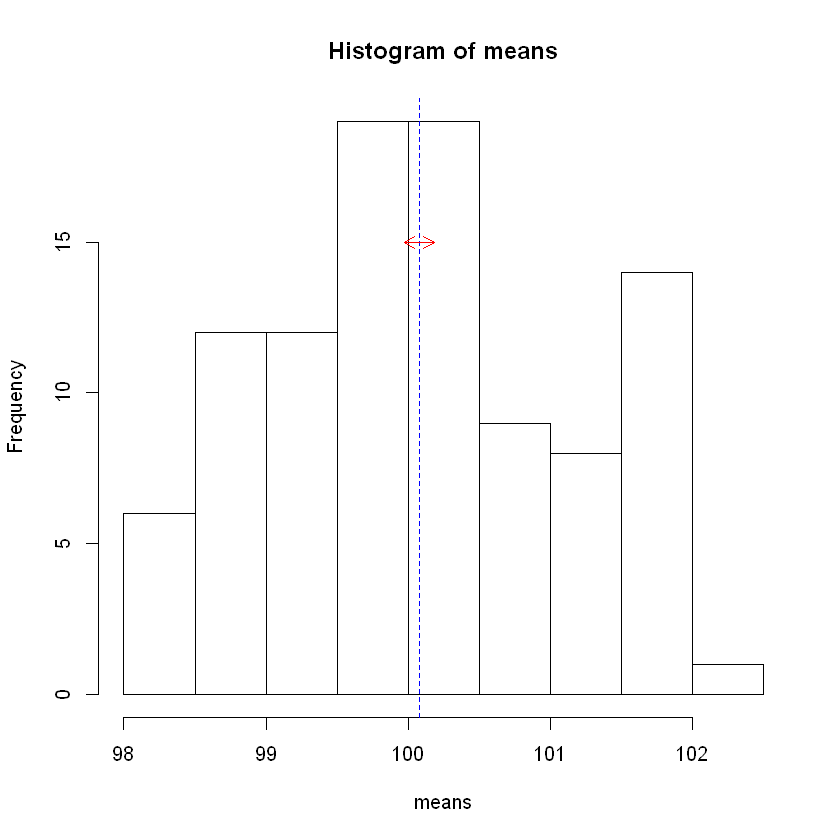

In [46]:
sem = sd(means)/sqrt(length(means))
hist(means)
abline(v=mean(means), col="blue", lty=2)
arrows((-sem+mean(means)),15,(sem+mean(means)),15, length =.1, code=3, col="red") #x0/y0 and x1/y1

## Exercise 6.  Using a new "for loop" calculate the sample mean for samples of 10,20,50,100,200,500,1000 sample size.


In [47]:
samples = c(10,20,50,100,200,500,1000)
loops = 1:length(samples)
new_means = vector('numeric', length(samples))
  
for (i in loops) {
  new_means[i] = mean(rnorm(samples[i],mean=100,sd=10))
}

#QUESTION - why does this not give the same results when repeated?




## Exercise 7. Now try doing this using the sapply syntax above. It's okay to rotely copy it at this point. Slowly learning to extend this construct to various settings will help make your use of R much less frustrating (if initially harder to read).


In [57]:
sampMeans <- rep(0,length(samples))
sampMeans[1:length(samples)] <- sapply( samples, function(x) mean(rnorm(x,mean=100,sd=10)) )




## Exercise 8. On a new plot, plot you sample mean as a function of sample size.
### Add three curves to your plot that correspond to the theoretical mean (solid line) and the range of 95% confidence for the sample mean (two dotted lines)


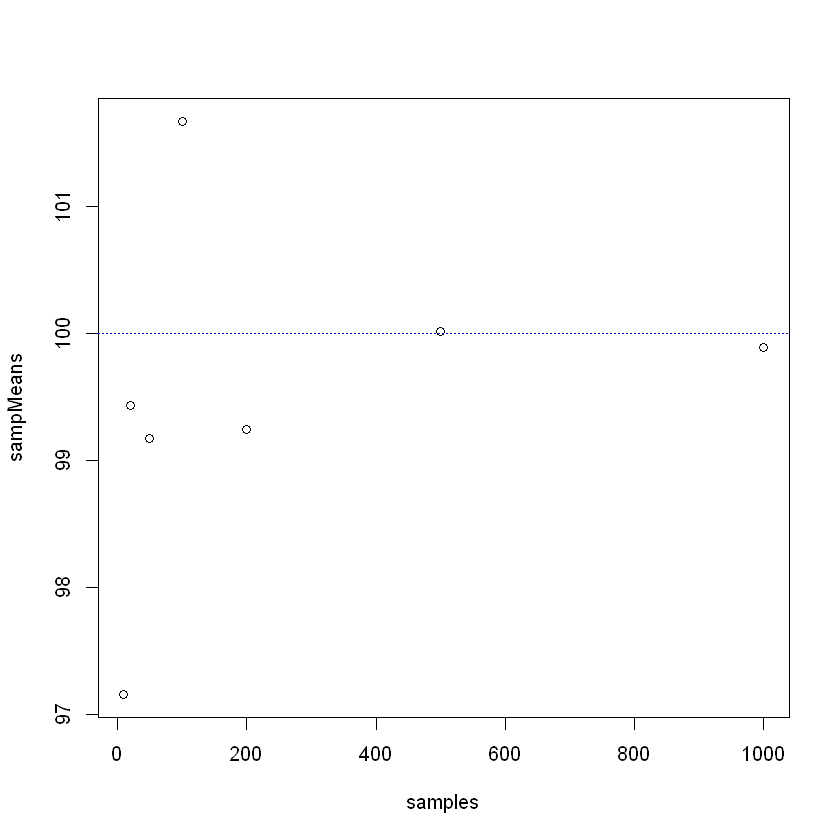

In [58]:
plot(samples, sampMeans)
abline(h=100, col="blue", lty=3)
